<a href="https://colab.research.google.com/github/SreejaBalaji/cnn/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image 
import os 


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_path = "/content/drive/MyDrive/basedata/train"
val_path = "/content/drive/MyDrive/basedata/validation"

In [5]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [6]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [7]:
for layer in vgg.layers:
  layer.trainable = False

In [8]:
x = Flatten()(vgg.output)
prediction = Dense(2, activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
from tensorflow.keras.optimizers import Adam


model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [11]:
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [12]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 3,
                                                 class_mode = 'categorical')

Found 114 images belonging to 2 classes.


In [13]:
val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (224, 224),
                                            batch_size = 3,
                                            class_mode = 'categorical')

Found 21 images belonging to 2 classes.


In [14]:
model_fit = model.fit(train_set,steps_per_epoch = 3,epochs = 10,validation_data = val_set)

Epoch 1/10
3/3 [==============================] - 18s 8s/step - loss: 1.0814 - accuracy: 0.5556 - val_loss: 0.9419 - val_accuracy: 0.7143
Epoch 2/10
3/3 [==============================] - 16s 7s/step - loss: 2.2588 - accuracy: 0.7778 - val_loss: 0.1601 - val_accuracy: 0.9524
Epoch 3/10
3/3 [==============================] - 16s 7s/step - loss: 0.5172 - accuracy: 0.7778 - val_loss: 1.1736 - val_accuracy: 0.7619
Epoch 4/10
3/3 [==============================] - 16s 7s/step - loss: 1.3106 - accuracy: 0.5556 - val_loss: 0.6917 - val_accuracy: 0.9048
Epoch 5/10
3/3 [==============================] - 16s 7s/step - loss: 1.6690 - accuracy: 0.7778 - val_loss: 0.2803 - val_accuracy: 0.9524
Epoch 6/10
3/3 [==============================] - 16s 7s/step - loss: 1.5896 - accuracy: 0.8889 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 16s 7s/step - loss: 0.8165 - accuracy: 0.7778 - val_loss: 0.0570 - val_accuracy: 0.9524
Epoch 8/10
3/3 [==================

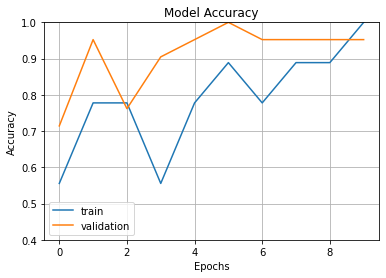

In [15]:
fig1 = plt.gcf()
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [16]:
train_set.class_indices

{'crack': 0, 'no_crack': 1}

In [ ]:
rmdir /content/drive/MyDrive/basedata/test/.ipynb_checkpoints

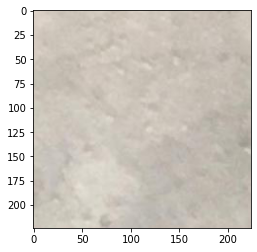

no crack detected


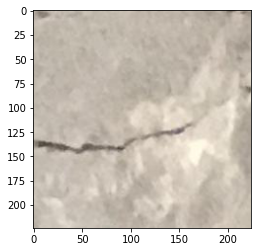

crack found


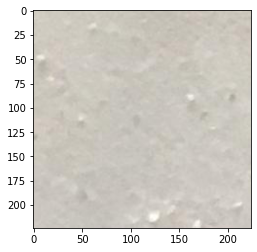

no crack detected


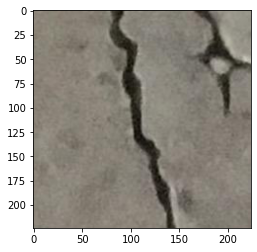

crack found


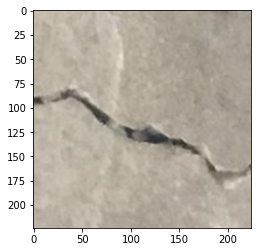

crack found


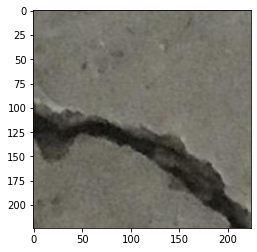

crack found


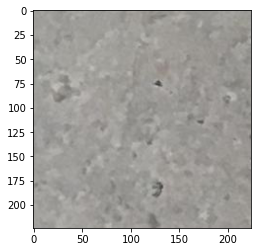

no crack detected


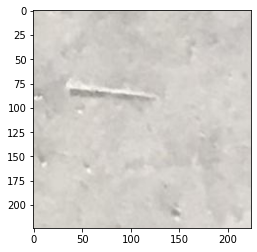

no crack detected


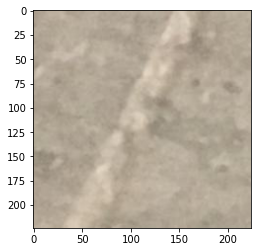

no crack detected


In [17]:
dir_path ='/content/drive/MyDrive/basedata/test'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i)
    im=Image.open(dir_path+'//'+i)
    resized_image = img.resize((224,224))
    
    plt.imshow(resized_image)
    plt.show()
    
    X = image.img_to_array(resized_image)
    X = np.expand_dims(X,axis=0)

    images = np.vstack([X])
  
    val = model.predict(images)
    va = val[0][1]
    num = int(round(va))
    
    if num == 1 :
       print("no crack detected")
    else:
       print("crack found")